#  Exploratory Data Analysis in Python

## T-test to Evaluate the Impact of Monthly Charge on Churn

Exploratory Data Analysis (EDA) is a critical step in understanding and interpreting data before delving into complex modeling or analysis. In this tutorial, we will perform an EDA using Python to examine the relationship between monthly charge and churn in a telecom dataset. Specifically, we will employ a T-test to determine if there is a significant difference in the monthly charges between customers who churn and those who do not.

### Dataset Description

Our dataset contains information about telecom customers, including their monthly charge and churn status (whether they have churned or not). We aim to explore whether the monthly charge has a discernible impact on churn.

### Steps in the Exploratory Data Analysis

1. **Loading the Dataset**: We will begin by loading the dataset into a Pandas DataFrame for further analysis.

2. **Data Cleaning and Preparation**: In this step, we will handle any missing values, perform data transformations, and prepare the dataset for analysis.

3. **Univariate Analysis**: We will visualize the distribution of the monthly charge using a histogram or kernel density plot. This will provide insights into the range, central tendency, and spread of the charges.

4. **Bivariate Analysis**: To investigate the relationship between monthly charge and churn, we will create a box plot or violin plot, comparing the charges for customers who churned and those who did not. This will help us determine if there are significant differences in the charges between the two groups.

5. **T-test for Statistical Significance**: To quantify the significance of the observed differences, we will perform a T-test between the monthly charges of churned and non-churned customers. This test will assess whether the differences we observed are statistically significant.

By following these steps, we will gain insights into the relationship between monthly charge and churn in the telecom dataset. The T-test will allow us to determine if the observed differences in monthly charges between churned and non-churned customers are statistically significant.
 

In [1]:
#import all the packages

import numpy as np
import pandas as pd
from pandas import DataFrame
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statistics 
 

In [2]:
churndata = pd.read_csv('EDA_Input.csv')
churndata.to_csv('EDA_Output.csv')

In [3]:
print(churndata.head())

   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     

In [4]:
print(churndata.Churn, churndata.MonthlyCharge)

0        No
1       Yes
2        No
3        No
4       Yes
       ... 
9995     No
9996     No
9997     No
9998     No
9999     No
Name: Churn, Length: 10000, dtype: object 0       172.455519
1       242.632554
2       159.947583
3       119.956840
4       149.948316
           ...    
9995    159.979400
9996    207.481100
9997    169.974100
9998    252.624000
9999    217.484000
Name: MonthlyCharge, Length: 10000, dtype: float64


In [5]:
 churndata.Churn == 'No' ##does not work

0        True
1       False
2        True
3        True
4       False
        ...  
9995     True
9996     True
9997     True
9998     True
9999     True
Name: Churn, Length: 10000, dtype: bool

In [6]:
churndata['Churn'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Churn, Length: 10000, dtype: bool

In [7]:
churndata['MonthlyCharge'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: MonthlyCharge, Length: 10000, dtype: bool

# basic data information

In [8]:
churndata.shape

(10000, 50)

In [9]:
churndata.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [10]:
churndata.shape[0]

10000

In [11]:
churndata.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


# Research Question: Does MonthlyCharge affect Churn?

# Look at monthly charge for ChurnYes and ChurnNo customers


## ttest


The question I will be testing with my t-test is that MonthlyCharge does not affect Churn.

In order to reject the null hypothesis, there will need to be a p-value of .05 or less.


### I felt like the t-test was the best choice of t-test, ANOVA or Chi squared

In [12]:
independentVariable = pd.read_csv('EDA_Input.csv', index_col = 'Churn')
ChurnYes = independentVariable.loc[['Yes'], ['MonthlyCharge']]
ChurnNo = independentVariable.loc[['No'], ['MonthlyCharge']]
 

t_statistic, p_value = stats.ttest_ind(ChurnYes, ChurnNo, equal_var = False)
print('The t-statistic is: ', t_statistic , 'The p_value is: ', p_value)

 

The t-statistic is:  [39.28778644] The p_value is:  [1.78239417e-290]


### Confirmed with Z-test since it is because of the large sample size 

In [13]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(ChurnYes, ChurnNo, value=0)

(array([40.18947672]), array([0.]))

# Look at monthly charge for ChurnYes and ChurnNo customers

In [14]:
t , p = stats.ttest_ind(ChurnYes, ChurnNo, axis=0, nan_policy='omit')

In [15]:
print(f't-value: {t}')

t-value: [40.18947672]


In [16]:
print(f'p-value: {p}')

p-value: [0.]


Since we have a pvalue of less than .05, we can reject the null hypothesis that MonthlyChurn does not affect churn.

Which means that the MonthlyCharge does affect Churn.


array([[<Axes: title={'center': 'MonthlyCharge'}>]], dtype=object)

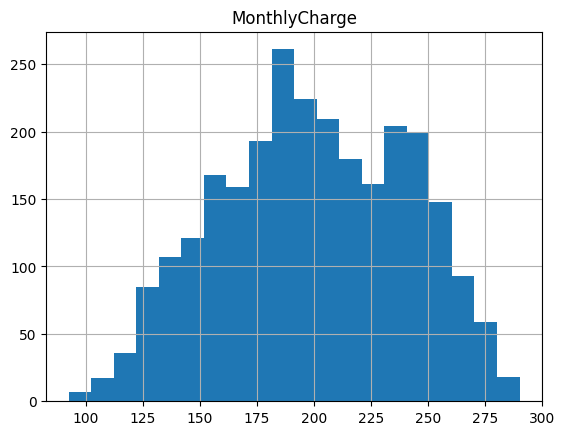

In [17]:
ChurnYes.hist(bins = 20)

### The mean monthly charge  for the churning customers is $199.30 a month



In [18]:
ChurnYes.describe()

,MonthlyCharge
count,2650.000000
mean,199.295175
std,41.268191
min,92.455140
25%,167.484705
50%,200.118500
75%,232.641455
max,290.160419


array([[<Axes: title={'center': 'MonthlyCharge'}>]], dtype=object)

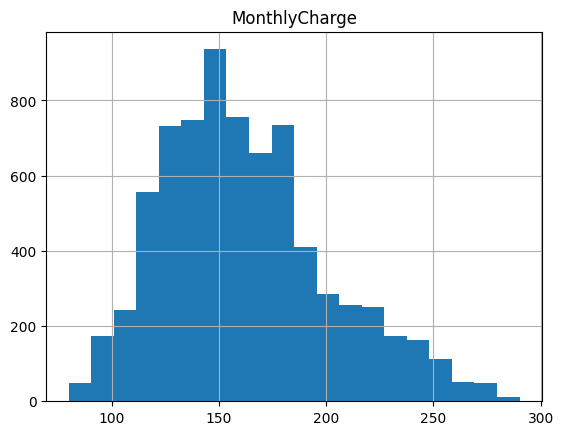

In [19]:
ChurnNo.hist(bins = 20 )

### The mean monthly charge  for the non churning customers is $163.01 a month

In [20]:
ChurnNo.describe()

,MonthlyCharge
count,7350.000000
mean,163.008973
std,39.322148
min,79.978860
25%,137.439154
50%,159.964200
75%,184.978458
max,290.160400


## A couple other areas I want to look 

Some of the columns I was most interested, based on the PCA and previous assignments were: churn, Contract, Income, MonthlyCharge, Bandwidth_GB_Year 

In [21]:
Churn_subset = churndata[[ 'Churn',  'Contract' , 'Income',  'MonthlyCharge','Bandwidth_GB_Year']]

In [22]:
Churn_subset

,Churn,Contract,Income,MonthlyCharge,Bandwidth_GB_Year
0,No,One year,28561.99,172.455519,904.536110
1,Yes,Month-to-month,21704.77,242.632554,800.982766
2,No,Two Year,9609.57,159.947583,2054.706961
3,No,Two Year,18925.23,119.956840,2164.579412
4,Yes,Month-to-month,40074.19,149.948316,271.493436
...,...,...,...,...,...
9995,No,Month-to-month,55723.74,159.979400,6511.252601
9996,No,Two Year,34129.34,207.481100,5695.951810
9997,No,Month-to-month,45983.43,169.974100,4159.305799
9998,No,Two Year,16667.58,252.624000,6468.456752


In [23]:
Churn_subset.describe()

,Income,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000
mean,39806.926771,172.624816,3392.341550
std,28199.916702,42.943094,2185.294852
min,348.670000,79.978860,155.506715
25%,19224.717500,139.979239,1236.470827
50%,33170.605000,167.484700,3279.536903
75%,53246.170000,200.734725,5586.141370
max,258900.700000,290.160419,7158.981530


## A couple more univariate graphs

array([[<Axes: title={'center': 'Bandwidth_GB_Year'}>]], dtype=object)

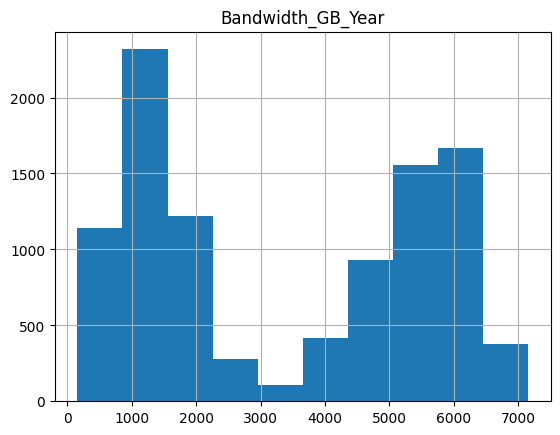

In [24]:
churndata.hist('Bandwidth_GB_Year') 

array([[<Axes: title={'center': 'MonthlyCharge'}>]], dtype=object)

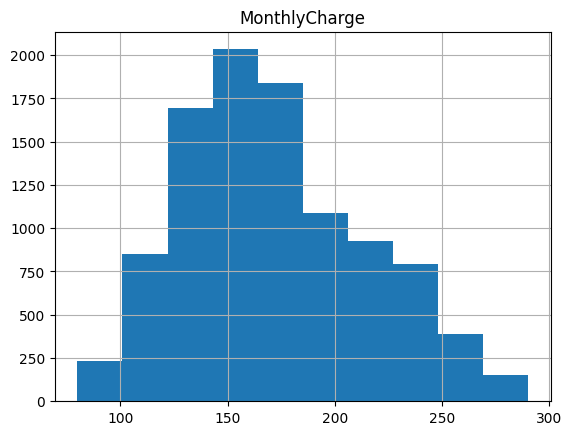

In [25]:
churndata.hist('MonthlyCharge') 

array([[<Axes: title={'center': 'Income'}>]], dtype=object)

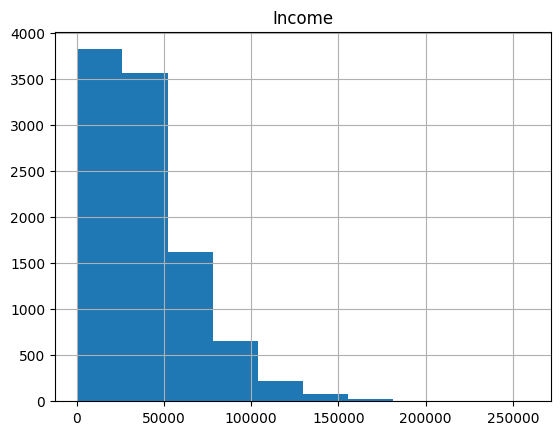

In [26]:
churndata.hist('Income')

### Monthly Charge boxplot

<Axes: >

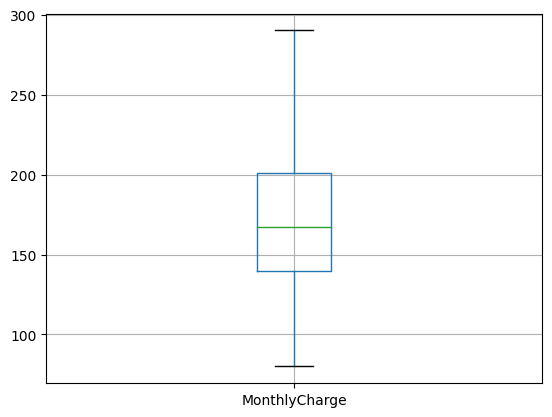

In [27]:
churndata.boxplot(['MonthlyCharge'])

### Bandwidth_GB_Year boxplot

<Axes: >

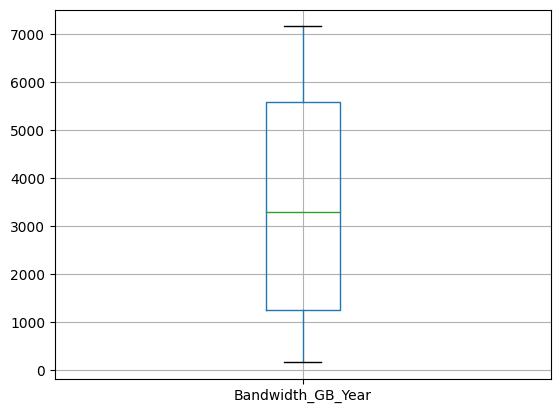

In [28]:
churndata.boxplot(['Bandwidth_GB_Year'])


### 

# Categorical Univariate

In [29]:
churndata.Contacts 

0       0
1       0
2       0
3       2
4       2
       ..
9995    2
9996    2
9997    0
9998    1
9999    1
Name: Contacts, Length: 10000, dtype: int64

In [30]:
churndata.Contract.describe()

count              10000
unique                 3
top       Month-to-month
freq                5456
Name: Contract, dtype: object

Text(0.5, 1.0, 'Contract Type')

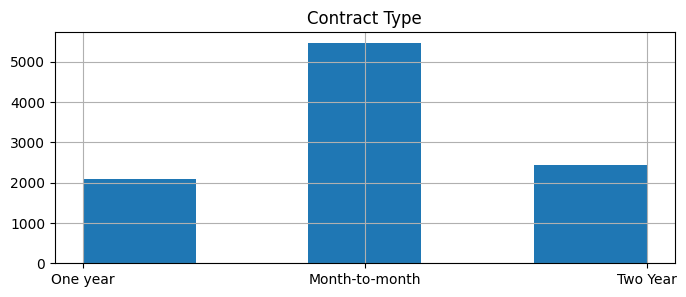

In [31]:
churndata.Contract.hist(bins = 5, figsize=(8,3))
plt.title('Contract Type')

In [32]:
churndata.Contract.count()

10000

Text(0.5, 1.0, 'Churn')

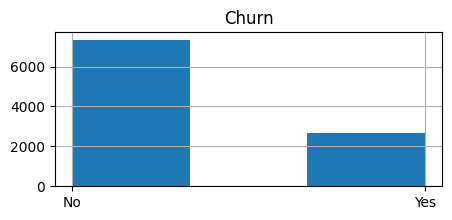

In [33]:
churndata.Churn.hist(bins = 3,  figsize=(5,2))
plt.title('Churn')
                     

# Bivariate graphs

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

 

Scatter plot of a couple continuous columns

# Scatterplot for  Bandwidth_GB_Year and MonthlyCharge

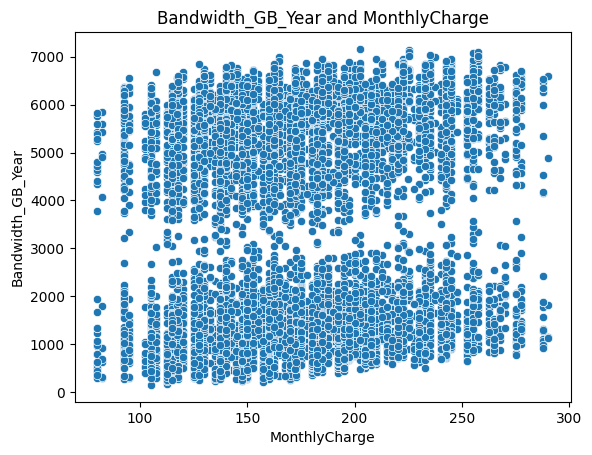

In [35]:
plt.title('Bandwidth_GB_Year and MonthlyCharge')
sns.scatterplot(x=churndata['MonthlyCharge'], y=churndata['Bandwidth_GB_Year'])
plt.show(); 

# Scatterplot for  Bandwidth_GB_Year and MonthlyCharge

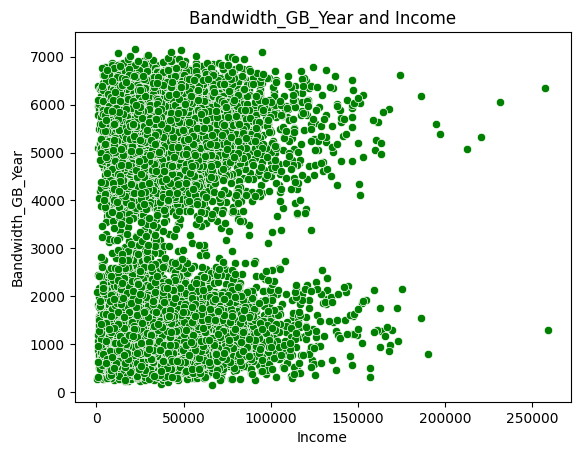

In [36]:
plt.title('Bandwidth_GB_Year and Income')
sns.scatterplot(x=churndata['Income'], y=churndata['Bandwidth_GB_Year'],color='green')
plt.show(); 

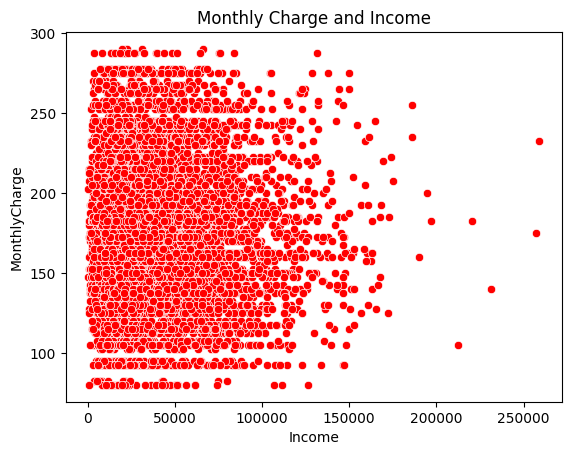

In [37]:
plt.title('Monthly Charge and Income')
sns.scatterplot(x=churndata['Income'], y=churndata['MonthlyCharge'],color='red')
plt.show(); 

C:\Users\bugfr\AppData\Local\Temp\ipykernel_12048\2203629301.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(churndata['Churn'], churndata['Contract'], cmap='Set2')


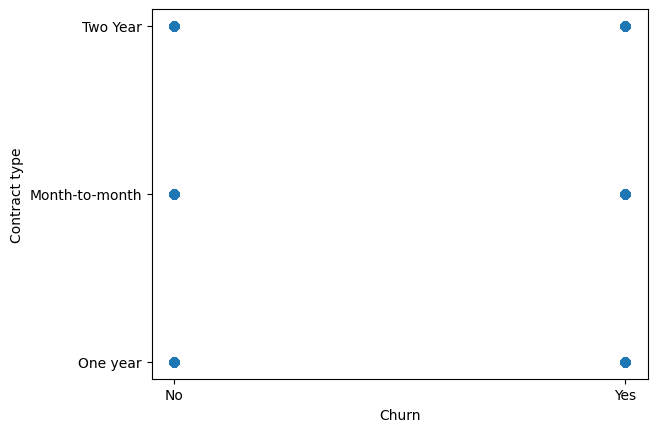

In [38]:
#Scatterplot for MonthlyCharge for both Churn =  Yes and Churn = No customers  
plt.scatter(churndata['Churn'], churndata['Contract'], cmap='Set2')
plt.ylabel('Contract type')
plt.xlabel('Churn')
plt.show()
